In [ ]:
import pandas as pd
import numpy as np

In [ ]:
taiwan_real_estate = pd.read_csv('taiwan_real_estate2.csv')
taiwan_real_estate

,dist_to_mrt_m,n_convenience,house_age_years,price_twd_msq
0,84.87882,10,30 to 45,11.467474
1,306.59470,9,15 to 30,12.768533
2,561.98450,5,0 to 15,14.311649
3,561.98450,5,0 to 15,16.580938
4,390.56840,5,0 to 15,13.040847
...,...,...,...,...
409,4082.01500,0,0 to 15,4.659607
410,90.45606,9,0 to 15,15.128593
411,390.96960,7,15 to 30,12.284418
412,104.81010,5,0 to 15,15.885023


## Visualizing two numeric variables

1. Import the seaborn package, aliased as sns.
2. Using taiwan_real_estate, draw a scatter plot of "price_twd_msq" (y-axis) versus "n_convenience" (x-axis).
3. Draw a trend line calculated using linear regression. Omit the confidence interval ribbon. Note: The scatter_kws argument, makes the data points 50% transparent.

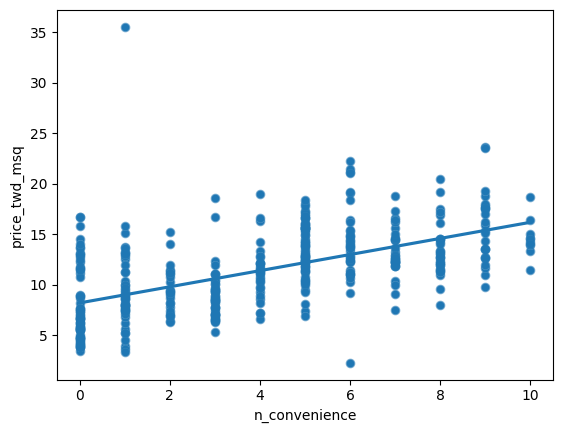

In [ ]:
# Import seaborn with alias sns
import seaborn as sns

# Import matplotlib.pyplot with alias plt
import matplotlib.pyplot as plt

# Draw the scatter plot
sns.scatterplot(x = 'n_convenience', y = 'price_twd_msq', data = taiwan_real_estate)

# Draw a trend line on the scatter plot of price_twd_msq vs. n_convenience
sns.regplot(x='n_convenience',
         y='price_twd_msq',
         data=taiwan_real_estate,
         ci=None,
         scatter_kws={'alpha': 0.5})

# Show the plot
plt.show()

## Linear regression with ols()

1. Import the ols() function from the statsmodels.formula.api package.
2. Run a linear regression with price_twd_msq as the response variable, n_convenience as the explanatory variable, and taiwan_real_estate as the dataset. Name it mdl_price_vs_conv.
3. Fit the model.
4. Print the parameters of the fitted model.

In [ ]:
# Import the ols function
from statsmodels.formula.api import ols

# Create the model object
mdl_price_vs_conv = ols('price_twd_msq ~ n_convenience', data=taiwan_real_estate)

# Fit the model
mdl_price_vs_conv = mdl_price_vs_conv.fit()

# Print the parameters of the fitted model
print(mdl_price_vs_conv.params)

Intercept        8.224237
n_convenience    0.798080
dtype: float64


## Visualizing numeric vs. categorical

Using taiwan_real_estate, plot a histogram of price_twd_msq with 10 bins. Split the plot by house_age_years to give 3 panels.



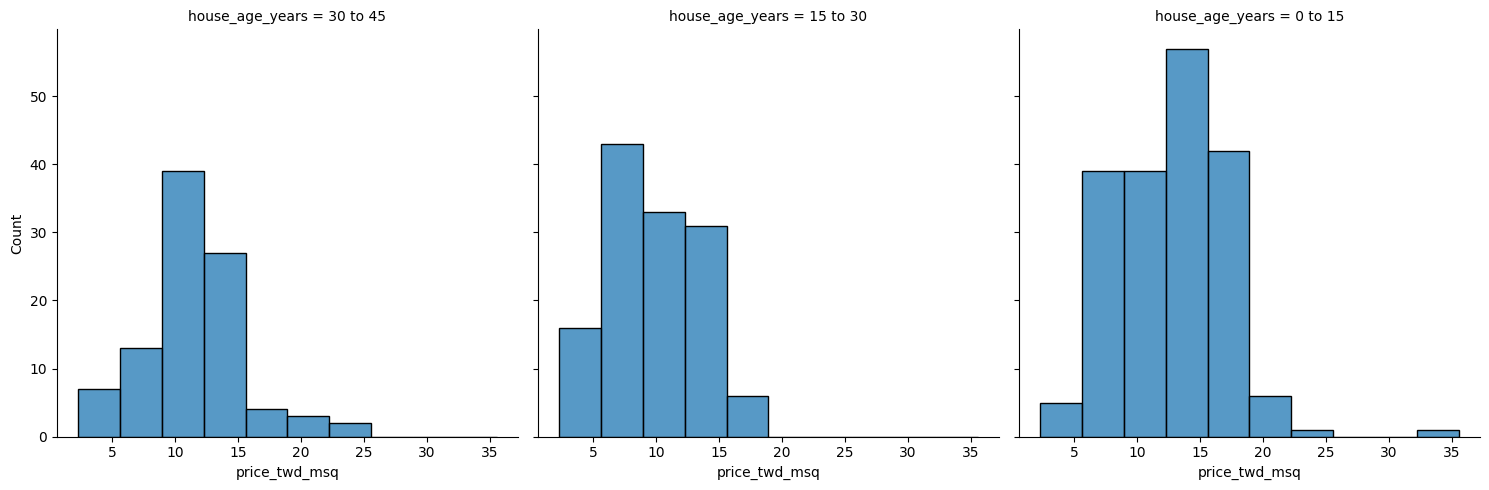

In [ ]:
# Histograms of price_twd_msq with 10 bins, split by the age of each house
sns.displot(data=taiwan_real_estate,
         x='price_twd_msq',
         col='house_age_years',
         bins=10)

# Show the plot
plt.show()

## Calculating means by category

1. Group taiwan_real_estate by house_age_years and calculate the mean price (price_twd_msq) for each age group. Assign the result to mean_price_by_age.
2. Print the result and inspect the output.

In [ ]:
# Calculate the mean of price_twd_msq, grouped by house age
mean_price_by_age = taiwan_real_estate.groupby('house_age_years')['price_twd_msq'].mean()

# Print the result
print(mean_price_by_age)

house_age_years
0 to 15     12.637471
15 to 30     9.876743
30 to 45    11.393264
Name: price_twd_msq, dtype: float64


## Linear regression with a categorical explanatory variable

1. Run and fit a linear regression with price_twd_msq as the response variable, house_age_years as the explanatory variable, and taiwan_real_estate as the dataset. Assign to mdl_price_vs_age.
2. Print its parameters.

In [ ]:
# Create the model, fit it
mdl_price_vs_age = ols('price_twd_msq ~ house_age_years', data=taiwan_real_estate).fit()

# Print the parameters of the fitted model
print(mdl_price_vs_age.params)

Intercept                      12.637471
house_age_years[T.15 to 30]    -2.760728
house_age_years[T.30 to 45]    -1.244207
dtype: float64


In [ ]:
# y = b0 + b1x1 + b2x2
# y = b1x1 + b2x2 + b3x3

1. Run and fit a linear regression with price_twd_msq as the response variable, house_age_years as the explanatory variable, and taiwan_real_estate as the dataset. Assign to mdl_price_vs_age.
2. Print its parameters.

In [ ]:
# Update the model formula to remove the intercept
mdl_price_vs_age = ols('price_twd_msq ~ house_age_years + 0', data=taiwan_real_estate).fit()

# Print the parameters of the fitted model
print(mdl_price_vs_age.params)

house_age_years[0 to 15]     12.637471
house_age_years[15 to 30]     9.876743
house_age_years[30 to 45]    11.393264
dtype: float64


In [ ]:
taiwan_real_estate.head()

,dist_to_mrt_m,n_convenience,house_age_years,price_twd_msq
0,84.87882,10,30 to 45,11.467474
1,306.59470,9,15 to 30,12.768533
2,561.98450,5,0 to 15,14.311649
3,561.98450,5,0 to 15,16.580938
4,390.56840,5,0 to 15,13.040847


In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
X = taiwan_real_estate[['n_convenience']]
y = taiwan_real_estate['price_twd_msq']

In [ ]:
X

,n_convenience
0,10
1,9
2,5
3,5
4,5
...,...
409,0
410,9
411,7
412,5


In [ ]:
y

0      11.467474
1      12.768533
2      14.311649
3      16.580938
4      13.040847
         ...    
409     4.659607
410    15.128593
411    12.284418
412    15.885023
413    19.334342
Name: price_twd_msq, Length: 414, dtype: float64

In [ ]:
model = LinearRegression().fit(X, y)

In [ ]:
model.coef_

array([0.79807972])

In [ ]:
model.intercept_

8.224237452790335

In [ ]:
mdl_price_vs_conv.params

Intercept        8.224237
n_convenience    0.798080
dtype: float64

In [ ]:
X = taiwan_real_estate[['house_age_years']]
y = taiwan_real_estate['price_twd_msq']

In [ ]:
model = LinearRegression().fit(X, y)

ValueError: ignored